<a href="https://colab.research.google.com/github/netakopel/Kaggle_Projects/blob/main/titanic_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier


Load the Data

In [ ]:
df_train = pd.read_csv('train.csv')
features_train = df_train.drop(columns=["Survived"])
labels_train = df_train["Survived"]
features_test = pd.read_csv('test.csv')



EDA

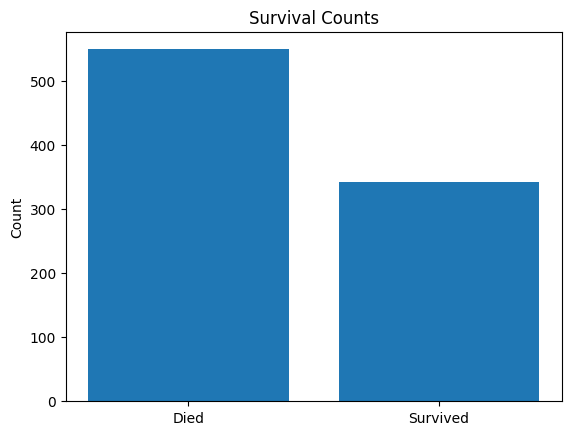

In [ ]:
# check for frequancy of missing data
df_train.isnull().mean()

# survival distribution
survived_counts = df_train['Survived'].value_counts()
plt.bar(['Died', 'Survived'], survived_counts)
plt.title('Survival Counts')
plt.ylabel('Count')
plt.show()

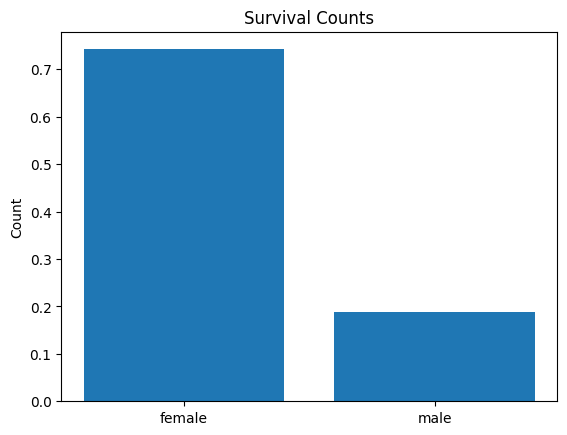

In [ ]:
# gender survival distribution
survived_by_sex = df_train.groupby('Sex')['Survived'].mean()
plt.bar(survived_by_sex.index, survived_by_sex.values)
plt.title('Survival Precentage per Sex')
plt.ylabel('Precentage')
plt.show()

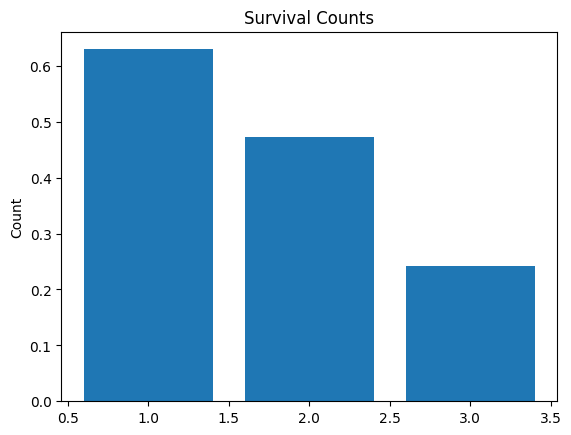

In [ ]:
survived_by_Pclass = df_train.groupby('Pclass')['Survived'].mean()
plt.bar(survived_by_Pclass.index, survived_by_Pclass.values)
plt.title('Survival Precentage per Pclass')
plt.ylabel('Precentage')
plt.show()

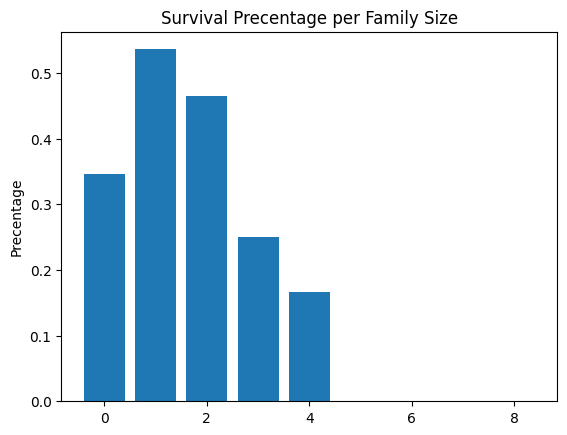

In [ ]:
df_train["FamilySize"] = df_train["SibSp"] + df_train["Parch"]
survived_by_family_size = df_train.groupby("FamilySize")["Survived"].mean()
plt.bar(survived_by_family_size.index, survived_by_family_size.values)
plt.title('Survival Precentage per Family Size')
plt.ylabel('Precentage')
plt.show()

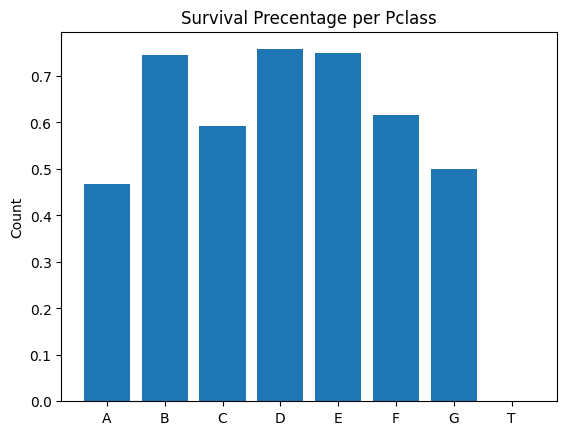

In [ ]:
df_train['CabinFirstLetter'] = df_train['Cabin'].str[0]
survived_by_cabin_first_letter = df_train.groupby('CabinFirstLetter')['Survived'].mean()
plt.bar(survived_by_cabin_first_letter.index, survived_by_cabin_first_letter.values)
plt.title('Survival Precentage per Pclass')
plt.ylabel('Precentage')
plt.show()

/tmp/ipython-input-130-3087801083.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survived_by_fair_bucket = df_train.groupby('FareBucket')['Survived'].mean()


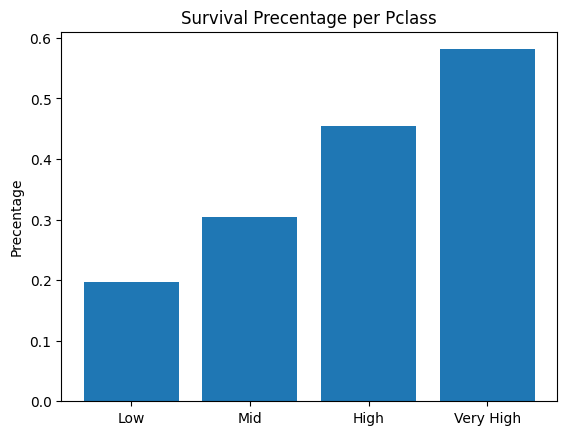

In [ ]:
df_train["FareBucket"] = pd.qcut(df_train["Fare"], q=4, labels=["Low", "Mid", "High", "Very High"])
survived_by_fair_bucket = df_train.groupby('FareBucket')['Survived'].mean()
plt.bar(survived_by_fair_bucket.index, survived_by_fair_bucket.values)
plt.title('Survival Precentage per Pclass')
plt.ylabel('Precentage')
plt.show()

Feature Engineering

In [ ]:

def feature_engineer(features):
  # add HasCabin, FamilySize, FareCatagory feature
  features["HasCabin"] = features["Cabin"].notna()
  features["FamilySize"] = features["SibSp"] + features["Parch"]
  features["FareCatagory"] = pd.qcut(features["Fare"], q=4, labels=["Low", "Mid", "High", "Very High"])

  #fill age by median of gender and class
  features["Age"] =  features.groupby(["Sex","Pclass"])["Age"].transform(lambda x: x.fillna(x.mean()))

  #fill embarked by most frequent embarked
  most_frequent_embarked = features["Embarked"].mode()[0]
  features["Embarked"] =features["Embarked"].fillna(most_frequent_embarked)

  #change string features to numerical
  le = LabelEncoder()
  features["Sex"] = le.fit_transform(features["Sex"])
  features["Embarked"] = le.fit_transform(features["Embarked"])
  features["HasCabin"] = le.fit_transform(features["HasCabin"])
  features["FareCatagory"] = le.fit_transform(features["FareCatagory"])

  #drop non relevent fields
  features = features.drop(columns = ["Cabin","Fare","Name","Ticket"])
  return features




random forest model class

In [ ]:
class Forest_Model:
  def __init__ (self, features, labels):
    self.features = features
    self.labels = labels
  def train(self):
    self.model = RandomForestClassifier(n_estimators=100,random_state=42)
    self.model.fit(self.features,self.labels)
  def predict(self,features):
    return self.model.predict(features)



In [ ]:
class XGBoost_Model:
  def __init__ (self, features, labels):
    self.features = features
    self.labels = labels
  def train(self):
      self.model = XGBClassifier(
          n_estimators=100,
          max_depth=3,
          learning_rate=0.1,
          use_label_encoder=False,
          eval_metric='logloss',
          random_state=42
      )
      self.model.fit(self.features, self.labels)

  def predict(self, features):
      return self.model.predict(features)


running model


In [ ]:
features_train = feature_engineer(features_train)
features_test = feature_engineer(features_test)

choosing model


In [ ]:
model = Forest_Model(features_train,labels_train)

In [ ]:
model = XGBoost_Model(features_train,labels_train)

In [ ]:
model.train()
preds = model.predict(features_test)
submission = pd.DataFrame({"PassengerId": features_test["PassengerId"], "Survived": preds})
submission.to_csv("submission.csv", index=False)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [14:18:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
